In [2]:
''' 
#Lo dejo comentado para que tu lo comentes y descomentes a necesidad
!pip install matplotlib
!pip install seaborn 
'''

' \n#Lo dejo comentado para que tu lo comentes y descomentes a necesidad\n!pip install matplotlib\n!pip install seaborn \n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick

: 

In [ ]:
df_raw = pd.read_excel("../data/TABLA_ACCIDENTES_22.xlsx", sheet_name=0) #el excel tiene dos hojas pero solo queremos la primera

df_raw.head()

,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,HORA,COD_PROVINCIA,COD_MUNICIPIO,ISLA,ZONA,ZONA_AGRUPADA,...,PRIORI_OTRA,CONDICION_NIVEL_CIRCULA,CONDICION_FIRME,CONDICION_ILUMINACION,CONDICION_METEO,CONDICION_NIEBLA,CONDICION_VIENTO,VISIB_RESTRINGIDA_POR,ACERA,TRAZADO_PLANTA
0,1,2022,1,6,3,1,0,NaN,1,1,...,999,1,1,6,1,NaN,NaN,1,998,3
1,2,2022,1,5,16,1,1059,NaN,1,1,...,999,1,3,1,3,NaN,NaN,1,998,2
2,3,2022,1,6,21,1,0,NaN,1,1,...,0,1,1,6,2,NaN,NaN,1,998,2
3,4,2022,1,7,12,1,0,NaN,1,1,...,999,1,3,1,3,NaN,NaN,1,998,1
4,5,2022,1,7,12,1,0,NaN,1,1,...,999,1,1,1,1,NaN,NaN,1,998,3


: 

In [ ]:
#Esto es solo para no tener que cargar el dataframe cada vez que nos equivoquemos en algo, con ejecutar esta línea vale
df = df_raw.copy()

: 

In [ ]:
df.shape

(97916, 73)

: 

El Dataframe del que se parte contiene 97916 filas (registros) y 17 columnas (datos distintos)

In [ ]:
df.duplicated().sum()

np.int64(0)

: 

No hay filas duplicadas en el Dataset

In [ ]:
df.columns

Index(['ID_ACCIDENTE', 'ANYO', 'MES', 'DIA_SEMANA', 'HORA', 'COD_PROVINCIA',
       'COD_MUNICIPIO', 'ISLA', 'ZONA', 'ZONA_AGRUPADA', 'CARRETERA', 'KM',
       'SENTIDO_1F', 'TITULARIDAD_VIA', 'TIPO_VIA', 'TIPO_ACCIDENTE',
       'TOTAL_MU24H', 'TOTAL_HG24H', 'TOTAL_HL24H', 'TOTAL_VICTIMAS_24H',
       'TOTAL_MU30DF', 'TOTAL_HG30DF', 'TOTAL_HL30DF', 'TOTAL_VICTIMAS_30DF',
       'TOTAL_VEHICULOS', 'TOT_PEAT_MU24H', 'TOT_BICI_MU24H',
       'TOT_CICLO_MU24H', 'TOT_MOTO_MU24H', 'TOT_TUR_MU24H', 'TOT_FURG_MU24H',
       'TOT_CAM_MENOS3500_MU24H', 'TOT_CAM_MAS3500_MU24H', 'TOT_BUS_MU24H',
       'TOT_OTRO_MU24H', 'TOT_SINESPECIF_MU24H', 'TOT_PEAT_MU30DF',
       'TOT_BICI_MU30DF', 'TOT_CICLO_MU30DF', 'TOT_MOTO_MU30DF',
       'TOT_TUR_MU30DF', 'TOT_FURG_MU30DF', 'TOT_CAM_MENOS3500_MU30DF',
       'TOT_CAM_MAS3500_MU30DF', 'TOT_BUS_MU30DF', 'TOT_VMP_MU30DF',
       'TOT_OTRO_MU30DF', 'TOT_SINESPECIF_MU30DF', 'NUDO', 'NUDO_INFO',
       'CARRETERA_CRUCE', 'PRIORI_NORMA', 'PRIORI_AGENTE', 'PR

: 

Hay hasta 31 columnas indicando la gravedad del accidente, por lo que lo primero que haremos será agruparlas todas en una donde tan solo se indique la gravedad como leve, grave o mortal.

Lo primero para ello es entender nuestros datos, por ejemplo: 
    
    ¿La columna que indica el número de fallecidos computados a 30 días integra los fallecidos computados a 24 horas o son independientes?
    ¿La columna que indica el número de fallecidos computados a 30 días integra las victimas computadas a 24 horas o son independientes?

In [ ]:
print(f"Total de fallecidos registrados en el accidente computados a 24 horas mas que computados a 30 días {df.loc[df['TOTAL_MU24H'] > df['TOTAL_MU30DF']].shape[0]} \n")

print(f"Total de víctimas registrados en el accidente computados a 24 horas mas que computados a 30 días {df.loc[df['TOTAL_VICTIMAS_24H'] > df['TOTAL_VICTIMAS_30DF']].shape[0]})")

Total de fallecidos registrados en el accidente computados a 24 horas mas que computados a 30 días 0 

Total de víctimas registrados en el accidente computados a 24 horas mas que computados a 30 días 0)


: 

No existe ningun accidente con más fallecidos ni victimas computadas a 24 horas que a 30 días, se asume por tanto, que el registro computado a 30 días ya incluye el de 24 horas.. 


No vamos a eliminar el resto de columnas sobre fallecidos ya que aunque no se vayan a incluir en nuestro modelo pueden ser interesantes para analizar estadísticas.

Otra cuestión parecida a la anterior es si el número de heridos hospitalizados incluye también a los que acabaron muriendo. Este problema es más complicado, ya que si una víctima es hospitalizada y acaba muriendo en los 30 días posteriores es posible que cuente dentro de los dos grupos, no obstante dado que el total de victimas se calcula con la suma de fallecidos, hospitalizados y no hospitalizados, en teoría si alguien acaba falleciendo en el hospital no debería contar como victima hospitalizada ya que sino al hacer la suma estarían contando doble las victimas en estos casos, pero vamos a comprobarlo.

In [ ]:
df[['TOTAL_MU24H','TOTAL_MU30DF','TOTAL_HG24H','TOTAL_HG30DF']].loc[df['TOTAL_MU30DF'] > df['TOTAL_HG30DF']]

,TOTAL_MU24H,TOTAL_MU30DF,TOTAL_HG24H,TOTAL_HG30DF
16,1,1,0,0
133,1,1,0,0
196,1,1,0,0
324,0,1,1,0
446,2,2,0,0
...,...,...,...,...
97610,1,1,0,0
97619,1,1,0,0
97622,1,1,0,0
97646,0,1,1,0


: 

Como se puede comprobar hay columnas en las que el número de fallecidos en 30 días supera al de ingresados en el mismo periodo, aunque pudiera ser que fallecieron fuera sin ser ingresados. 

Pero filas como la 16 donde hay dos víctimas, y una falleció en 24 horas y la otra en los 30 días indican que en efecto la columna de fallecidos es independiente de la de hospitalizados en el mismo periodo.

In [ ]:
#más hospitalizados en 24 horas que en 30 días
df[['TOTAL_MU24H','TOTAL_MU30DF','TOTAL_HG24H', 'TOTAL_HG30DF','TOTAL_HL24H','TOTAL_HL30DF','TOTAL_VICTIMAS_24H','TOTAL_VICTIMAS_30DF']].loc[df['TOTAL_HG24H'] > df['TOTAL_HG30DF']]

,TOTAL_MU24H,TOTAL_MU30DF,TOTAL_HG24H,TOTAL_HG30DF,TOTAL_HL24H,TOTAL_HL30DF,TOTAL_VICTIMAS_24H,TOTAL_VICTIMAS_30DF
324,0,1,1,0,0,0,1,1
605,0,1,1,0,0,0,1,1
620,0,1,4,3,0,0,4,4
1568,0,1,1,0,2,2,3,3
1763,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...
97226,0,1,1,0,0,0,1,1
97229,0,1,1,0,0,0,1,1
97506,0,1,1,0,0,0,1,1
97646,0,1,1,0,0,0,1,1


: 

Es curioso que si que haya algunos casos donde hay más hospitalizados en 24 horas que en 30 días, por lo que a priori parece que en este caso estár hospitalizado en las primeras 24 horas no implica contar como que estuviste hospitalizado en los 30 días posteriores, no obstante hay algunas incoherencias:
- En todos los casos hubo un fallecido en 30 días y ninguno en 24 horas (Cuando solo era una victima)
- Si estuvo hospitalizado menos de 24 horas y no falleció en esas horas cabría pensar que se trata de un accidente leve, pero solo hay 232 casos cuando los accidentes leves deberían ser mayoritarios, además falleció en los siguientes 30 días lo que indica que fue un accidente mortal.

Teoría: Como hemos mencionado anteriormente alguien fallecido en 30 días no será incluido en la columna de hospitalizados en ese periodo ya que generaría un conteo doble en el total de víctimas, no obstante, si será incluido en los hospitalizados en 24 horas ya que eso no genera ningúna incoherencia. Por tanto, los casos que observamos en la tabla anterior son casos donde la victima del accidente fue llevada al hospital de inmediato (Hospitalizado 24 horas), no falleció en las primeras 24 horas pero sí falleció en los siguientes días y lo sacaron de la lista de hospitalizados en 30 días. En estos casos la víctima nunca fallece en las primeras 24 horas porque de hacerlo se le sacaría del número de hospitalizados en ese periodo (y en el siguiente también ya que contaría como fallecido).

Vamos a confirmar esta teoría, para ello se tienen que dar varias condiciones, que son:
- 1º Si el número de fallecidos en 24 horas es 0 y el número de fallecidos en 30 días es igual al de ingresados en 24 horas y mayor a 0, el número de ingresados en 30 días nunca podrá ser ni igual ni mayor al de fallecidos en 30 días.
- 2º En los casos donde el número de fallecidos computados a 24 horas y 30 días sea el mismo, y el número de ingresados computados a 24 horas y 30 días también lo sea, serán siempre casos en donde hubo más de una víctima (al menos una que falleció y una que sobrevivió) 
- 3º El total de víctimas en computados a 24 horas y computados a 30 días siempre será el mismo.

In [ ]:
# 1º Condición
df[['TOTAL_MU24H','TOTAL_MU30DF','TOTAL_HG24H', 'TOTAL_HG30DF','TOTAL_VICTIMAS_24H',
       'TOTAL_VICTIMAS_30DF','TOTAL_HL24H','TOTAL_HL30DF']].loc[(df['TOTAL_MU24H'] == 0) & (df['TOTAL_MU30DF']==df['TOTAL_HG24H']) & (df['TOTAL_MU30DF']>0) & (df['TOTAL_HG30DF']>=df['TOTAL_MU30DF'])].shape[0]


0

: 

In [ ]:
#2º Condición
df[['TOTAL_MU24H','TOTAL_MU30DF','TOTAL_HG24H', 'TOTAL_HG30DF','TOTAL_VICTIMAS_24H',
       'TOTAL_VICTIMAS_30DF']].loc[(df['TOTAL_MU24H'] == df['TOTAL_MU30DF']) & (df['TOTAL_HG24H']==df['TOTAL_MU30DF']) & (df['TOTAL_HG24H']==1)]


,TOTAL_MU24H,TOTAL_MU30DF,TOTAL_HG24H,TOTAL_HG30DF,TOTAL_VICTIMAS_24H,TOTAL_VICTIMAS_30DF
975,1,1,1,1,2,2
1303,1,1,1,1,2,2
1324,1,1,1,1,2,2
1332,1,1,1,1,2,2
1379,1,1,1,1,2,2
...,...,...,...,...,...,...
93982,1,1,1,1,2,2
94088,1,1,1,1,4,4
94451,1,1,1,1,2,2
97596,1,1,1,1,2,2


: 

In [ ]:
#3º Condición
df.loc[df['TOTAL_VICTIMAS_24H'] != df['TOTAL_VICTIMAS_30DF']].shape[0]

print(f"El número total de vitimas computadas a 24 horas diferentes a computadas a 30 dias es: {df.loc[df['TOTAL_VICTIMAS_24H'] != df['TOTAL_VICTIMAS_30DF']].shape[0]} victimas")

El número total de vitimas computadas a 24 horas diferentes a computadas a 30 dias es: 0 victimas


: 

Todas las condiciones se han cumplido, por lo que parece que la teoría planteada era correcta. Además se termina de concluir que los registros computados a 30 días incluyen los computados a 24 horas.

In [ ]:
# ALEX: Este creo que no aporta nada pero lo he dejado por si opinas lo contrario, si estás de acuerdo bórralo
df[['TOTAL_MU30DF','TOTAL_HG30DF','TOTAL_HL30DF','TOTAL_VICTIMAS_30DF']].loc[(df['TOTAL_MU30DF'] == df['TOTAL_HG30DF']) & (df['TOTAL_MU30DF'] > 1)]

,TOTAL_MU30DF,TOTAL_HG30DF,TOTAL_HL30DF,TOTAL_VICTIMAS_30DF
12034,2,2,2,6
12851,2,2,0,4
29576,2,2,6,10
30031,2,2,2,6
31432,3,3,0,6
83079,2,2,0,4
88434,2,2,6,10
91138,2,2,0,4


: 

In [ ]:
#Aquí habría que ver si borramos la de no hospitalizados en 24 horas, nos sirve de algo?
df = df.drop(['TOTAL_MU24H','TOTAL_VICTIMAS_24H'], axis=1)

: 

Diferenciaremos entre tres tipos de accidentes: Mortal, leve y sin lesiones. Ya que en el dataset no se indica el tipo de lesión vamos a establecer el siguiente criterio:

- Mortal = La víctima fallece (en cualquier periodo).
- Leve = Fue al hospital
- Sin lesiones = No fue al hospital

Se establece la columna tipo de accidente en función de la prioridad:

- Si hay una victima mortal, el accidente se clasifica como  'Mortal'
- Si no hay ningun accidente mortal pero al menos una víctima ha sido ingresada en el hospital, el accidente se clasifica como 'Leve'
- Si no hay ningun accidente mortal ni nadie ha sido ingresado en el hospital el accidente se clasifica como 'Sin_lesiones'

In [ ]:

def clasificar_accidentes(column):
    if column['TOTAL_MU30DF'] > 0:
        return 'Mortal'
    elif column['TOTAL_HG30DF'] > 0 & column['TOTAL_MU30DF'] == 0: 
        return 'Leve'
    else: 
        return 'Sin_lesiones'

df['TYP_ACC'] = df.apply(clasificar_accidentes, axis=1) # Crear la columna TYP_ACC basada en las condicione



: 

Se contabiliza el número de accidentes mortales, leves y sin lesiones que hay en el dataset

In [ ]:
cont_mortales = 0
cont_leves = 0
cont_sin_lesiones = 0

for i in df['TYP_ACC']:
    if i == "Mortal":
        cont_mortales += 1
    elif i == "Leve":
        cont_leves += 1
    else:
        cont_sin_lesiones +=1

total_accidentes = cont_mortales + cont_leves + cont_sin_lesiones #len(df)
porc_mortales = (cont_mortales/total_accidentes)*100
porc_leves = (cont_leves/total_accidentes)*100
porc_sin_lesiones = (cont_sin_lesiones/total_accidentes)*100

print(f"El numero de accidentes mortales es {cont_mortales} un {porc_mortales:.2f}% del total de accidentes\n")
print(f"El número de accidentes leves es {cont_leves} un {porc_leves:.2f}% del total de accidentes \n")
print(f"El número de accidentes sin lesiones es {cont_sin_lesiones} un {porc_sin_lesiones:.2f}% del total de accidentes")


El numero de accidentes mortales es 1620 un 1.65% del total de accidentes

El número de accidentes leves es 7410 un 7.57% del total de accidentes 

El número de accidentes sin lesiones es 88886 un 90.78% del total de accidentes


: 

Se extrae que la gran mayoría de accidentes han sido sin lesiones, una minoria leves y una gran minoria mortales.

# Limpieza y simplificación del Dataset

In [ ]:
# Eliminar irrelevantes
df = df.drop(['ID_ACCIDENTE','ZONA_AGRUPADA','ANYO','TITULARIDAD_VIA', 'TOT_PEAT_MU24H','TOT_BICI_MU24H','TOT_CICLO_MU24H',
       'TOT_SINESPECIF_MU24H','TOT_SINESPECIF_MU30DF','NUDO_INFO','CARRETERA_CRUCE','CONDICION_NIEBLA', 'TOT_MOTO_MU24H', 'TOT_TUR_MU24H','TOT_FURG_MU24H','TOT_CAM_MENOS3500_MU24H','TOT_CAM_MAS3500_MU24H', 'TOT_BUS_MU24H','TOT_OTRO_MU24H'
       ,'CONDICION_VIENTO','SENTIDO_1F','PRIORI_NORMA', 'PRIORI_AGENTE', 'PRIORI_SEMAFORO', 'PRIORI_VERT_STOP',
       'PRIORI_VERT_CEDA', 'PRIORI_HORIZ_STOP', 'PRIORI_HORIZ_CEDA','PRIORI_MARCAS', 'PRIORI_PEA_NO_ELEV', 'PRIORI_PEA_ELEV',
       'PRIORI_MARCA_CICLOS', 'ACERA','TIPO_VIA','VISIB_RESTRINGIDA_POR','CONDICION_NIVEL_CIRCULA','PRIORI_CIRCUNSTANCIAL',
       'PRIORI_OTRA','TRAZADO_PLANTA','COD_MUNICIPIO', 'ISLA',], axis=1)




: 

<font color="red">La de no hospitalizados 24 horas quieres que las eliminemos? no se me ocurre que valgan para nada no? </font>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97916 entries, 0 to 97915
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MES                       97916 non-null  int64  
 1   DIA_SEMANA                97916 non-null  int64  
 2   HORA                      97916 non-null  int64  
 3   COD_PROVINCIA             97916 non-null  int64  
 4   ZONA                      97916 non-null  int64  
 5   CARRETERA                 97916 non-null  object 
 6   KM                        50944 non-null  float64
 7   TIPO_ACCIDENTE            97916 non-null  int64  
 8   TOTAL_HG24H               97916 non-null  int64  
 9   TOTAL_HL24H               97916 non-null  int64  
 10  TOTAL_MU30DF              97916 non-null  int64  
 11  TOTAL_HG30DF              97916 non-null  int64  
 12  TOTAL_HL30DF              97916 non-null  int64  
 13  TOTAL_VICTIMAS_30DF       97916 non-null  int64  
 14  TOTAL_

: 

Parece que el dataset no tiene valores nulos excepto por la columna 'ISLA' que es normal porque la mayoría de accidentes ocurrieron en el territorio peninsular y en 'KM' que se trata de carreteras no inventariadas. No obstante esto no es cierto ya que en el dataset se utiliza 999 para indicar los valores faltantes, por eso parece que no hay nulos, vamos a eliminar estos valores para ver realmente como es nuestro Dataframe. También vamos a sustituir los valores nulos en 'ISLA' con 0 para indicar que no aplica.

In [ ]:
df = df.replace(999, np.nan)
df[['CONDICION_METEO']] = df[['CONDICION_METEO']].replace(7, np.nan)
df[['CONDICION_FIRME']] = df[['CONDICION_FIRME']].replace(9, np.nan)

: 

In [ ]:
#Comprobar el número de valores nulos en las columnas ajustadas
df_subset_nulls = df[['CONDICION_METEO','CONDICION_FIRME']]
df_subset_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97916 entries, 0 to 97915
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CONDICION_METEO  96411 non-null  float64
 1   CONDICION_FIRME  96610 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


: 

Aunque hay más nulos que antes, siguen siendo pocos teniendo en cuenta el tamaño del dataset, por la única columna que eliminaremos en base a este criterio es 'KM'

In [ ]:
df = df.drop(['KM'], axis=1)

: 

# Simplificación de las variables

Hay ciertas variables que aunque son categóricas como la provincia, el tipo de vía, el tipo de accidente, etc. Se encuentran en formato numérico, lo cual para entrenar el modelo será mejor pero para visualizar los datos puede ser muy confuso, por lo que vamos a crear diccionarios de todas ellas para ayudar visualizar los datos.

In [ ]:
#Diccionarios
mes = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

dia_semana = {1:'Lunes', 2:'Martes', 3:'Miércoles', 4:'Jueves', 5:'Viernes', 6:'Sábado', 7:'Domingo'}

cod_provincia = {1: 'Álava', 2: 'Albacete', 3: 'Alicante', 4: 'Almería', 5: 'Ávila', 6: 'Badajoz', 7: 'Islas Baleares', 8: 'Barcelona', 
                9: 'Burgos', 10: 'Cáceres', 11: 'Cádiz', 12: 'Castellón', 13: 'Ciudad Real', 14: 'Córdoba', 15: 'Coruña', 16: 'Cuenca', 
                17: 'Girona', 18: 'Granada', 19: 'Guadalajara', 20: 'Gipuzkoa', 21: 'Huelva', 22: 'Huesca', 23: 'Jaén', 24: 'León', 
                25: 'Lleida', 26: 'Rioja, La', 27: 'Lugo', 28: 'Madrid', 29: 'Málaga', 30: 'Murcia', 31: 'Navarra', 32: 'Ourense', 
                33: 'Asturias', 34: 'Palencia', 35: 'Las Palmas', 36: 'Pontevedra', 37: 'Salamanca', 38: 'Santa Cruz de Tenerife', 
                39: 'Cantabria', 40: 'Segovia', 41: 'Sevilla', 42: 'Soria', 43: 'Tarragona', 44: 'Teruel', 45: 'Toledo', 46: 'Valencia', 
                47: 'Valladolid', 48: 'Bizkaia', 49: 'Zamora', 50: 'Zaragoza', 51: 'Ceuta', 52: 'Melilla'}
df['PROVINCIA'] = df['COD_PROVINCIA'].map(cod_provincia)

zona = {1:'Carretera',2:'Travesía',3:'Calle',4:'Autopista o autovía urbana'}
#Me equivoqué, estos diccionarios no hacen falta, necesitamos ponerlos con las nuevas variables
tipo_accidente={1:'Colisión',2:'Atropello',3:'Salida de la vía',4:'Otros tipos de accidente'}

interseccion = {1:'En intersección', 2:'Fuera de intersección'}

condicion_meteo = {1:'Despejado',2:'Nublado',3:'Lluvia débil',4:'Lluvia fuerte',5:'Granizando',6:'Nevando'}

condicion_firme={1:'Seco y limpio',2:'Con barro o gravilla suelta',3:'Mojado',4:'Hielo',8:'Otra'}

condicion_iluminacion={1:'Luz del día natural',2:'Amanecer o atardecer',3:'Sin luz natural'}

: 

Debido a que más del 90% de accidentes se agrupan en la categoría 'Sin_lesiones' es necesario simplificar las variables con demasiadas categorías ya que sino cada accidente con leve o grave va a tener características únicas, dificultando enormemente tanto el analisis de los datos como el entrenamiento del modelo

In [ ]:
#diccionarios para simplificar las variables
tipo_accidente_simpl = {1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:2, 8:2, 11:3, 12:3, 13:3, 14:3, 15:3, 16:3, 17:3, 18:3, 19:3, 9:4, 10:4, 20:4}
condicion_firme_simpl = {1:1, 2:2, 3:3, 4:3, 5:4, 6:4, 7:4, 8:5}
condicion_iluminacion_simpl = {1:1, 2:2, 3:2,4:3, 5:3, 6:3}

#Actualización con las nuevas variables
df['TIPO_ACCIDENTE'] = df['TIPO_ACCIDENTE'].map(tipo_accidente_simpl)
df['CONDICION_FIRME'] = df['CONDICION_FIRME'].map(condicion_firme_simpl)
df['CONDICION_ILUMINACION'] = df['CONDICION_ILUMINACION'].map(condicion_iluminacion_simpl)


: 

In [ ]:
#Agrupación de provincias en comunidades autónomas
dict_prov_to_com={1:'País Vasco',2:'Castilla-La Mancha',3:'Comunidad Valenciana',4:'Andalucía',5:'Castilla y León',6:'Extremadura',
                  7:'Islas Baleares',8:'Cataluña',9:'Castilla y León',10:'Extremadura',11:'Andalucía',12:'Comunidad Valenciana',
                  13:'Castilla-La Mancha',14:'Andalucía',15:'Galicia',16:'Castilla-La Mancha',17:'Cataluña',18:'Andalucía',
                  19:'Castilla-La Mancha',20:'País Vasco',21:'Andalucía',22:'Aragón',23:'Andalucía',24:'Castilla y León',25:'Cataluña',
                  26:'La Rioja',27:'Galicia',28:'Comunidad de Madrid',29:'Andalucía',30:'Murcia',31:'Navarra',32:'Galicia',33:'Asturias',
                  34:'Castilla y León',35:'Islas Canarias',36:'Galicia',37:'Castilla y León',38:'Islas Canarias',39:'Cantabria',
                  40:'Castilla y León',41:'Andalucía',42:'Castilla y León',43:'Cataluña',44:'Aragón',45:'Castilla-La Mancha',
                  46:'Comunidad Valenciana',47:'Castilla y León',48:'País Vasco',49:'Castilla y León',50:'Aragón',51:'Ceuta',52:'Melilla'}

df['COMUNIDAD'] = df['COD_PROVINCIA'].map(dict_prov_to_com)

: 

In [ ]:
#Cambio de nombre columnas para evitar confusión
df.rename(columns={'TIPO_ACCIDENTE': 'MECANISMO_ACCIDENTE'}, inplace=True)
df.rename(columns={'CONDICION_FIRME': 'CONDICION_SUELO'}, inplace=True)
df.rename(columns={'NUDO': 'INTERSECCION'}, inplace=True)

: 

Por último vamos a crear una dataframe alternativo orientado al análisis de los datos y el original con los datos en formato numérico para el entrenamiento del modelo principalmente

In [ ]:
df_eda = df.copy()

df_eda['MES'] = df_eda['MES'].map(mes)
df_eda['DIA_SEMANA'] = df_eda['DIA_SEMANA'].map(dia_semana)
df_eda['ZONA'] = df_eda['ZONA'].map(zona)
df_eda['MECANISMO_ACCIDENTE'] = df_eda['MECANISMO_ACCIDENTE'].map(tipo_accidente)
df_eda['INTERSECCION'] = df_eda['INTERSECCION'].map(interseccion)
df_eda['CONDICION_METEO'] = df_eda['CONDICION_METEO'].map(condicion_meteo)
df_eda['CONDICION_SUELO'] = df_eda['CONDICION_SUELO'].map(condicion_firme)
df_eda['CONDICION_ILUMINACION'] = df_eda['CONDICION_ILUMINACION'].map(condicion_iluminacion)

: 

# Análisis de los datos

Lo primero de todo vamos a analizar la influencia de todas las variables con una matriz de correlación para ir de lo feneral a lo específico.

/tmp/ipykernel_1548/3755508346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["TYP_ACC"] = pd.factorize(df_subset["TYP_ACC"])[0]
/tmp/ipykernel_1548/3755508346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["COMUNIDAD"] = pd.factorize(df_subset["COMUNIDAD"])[0]


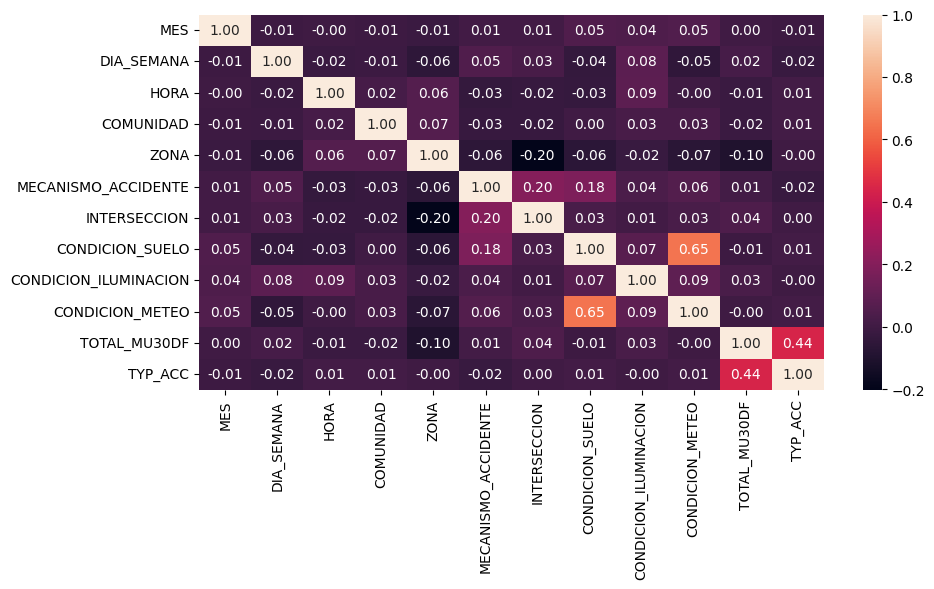

: 

In [ ]:
df_subset = df[['MES', 'DIA_SEMANA', 'HORA', 'COMUNIDAD','ZONA','MECANISMO_ACCIDENTE','INTERSECCION', 
            'CONDICION_SUELO', 'CONDICION_ILUMINACION','CONDICION_METEO','TOTAL_MU30DF', 'TYP_ACC']]
#Necesitamos convertir primero la variables categóricas a numéricas
df_subset["TYP_ACC"] = pd.factorize(df_subset["TYP_ACC"])[0]
df_subset["COMUNIDAD"] = pd.factorize(df_subset["COMUNIDAD"])[0]

#Crear la matriz
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df_subset.corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

Lo primero que se observa es la nula influencia de todas las variables en el tipo de accidente, esto era de esperar dado lo exageradamente poblado que está el dataset de accidentes tipo 'Sin Lesiones', por tanto, este primer análisis no concluye que las variables dependientes son incapaces de predecir la variable dependiente, sino que se requiere de más técnicas y un análisis más profundo.

Respecto a la relación entre variables dependientes, la más fuerte es entre la condicion del suelo y las condiciones meteorológicas, casi un 50% de correlación, además el mecanismo del accidente parece relacionarse bastante con si se da en una intersección o no.
El mecanismo y la si hay intersección tienen alrededor de un 20% de correlación con la zona, que tiene también un 16% de correlación con el número de víctimas del accidente.

In [ ]:
# Distribución de accidentes según el mes, el día y la hora

: 

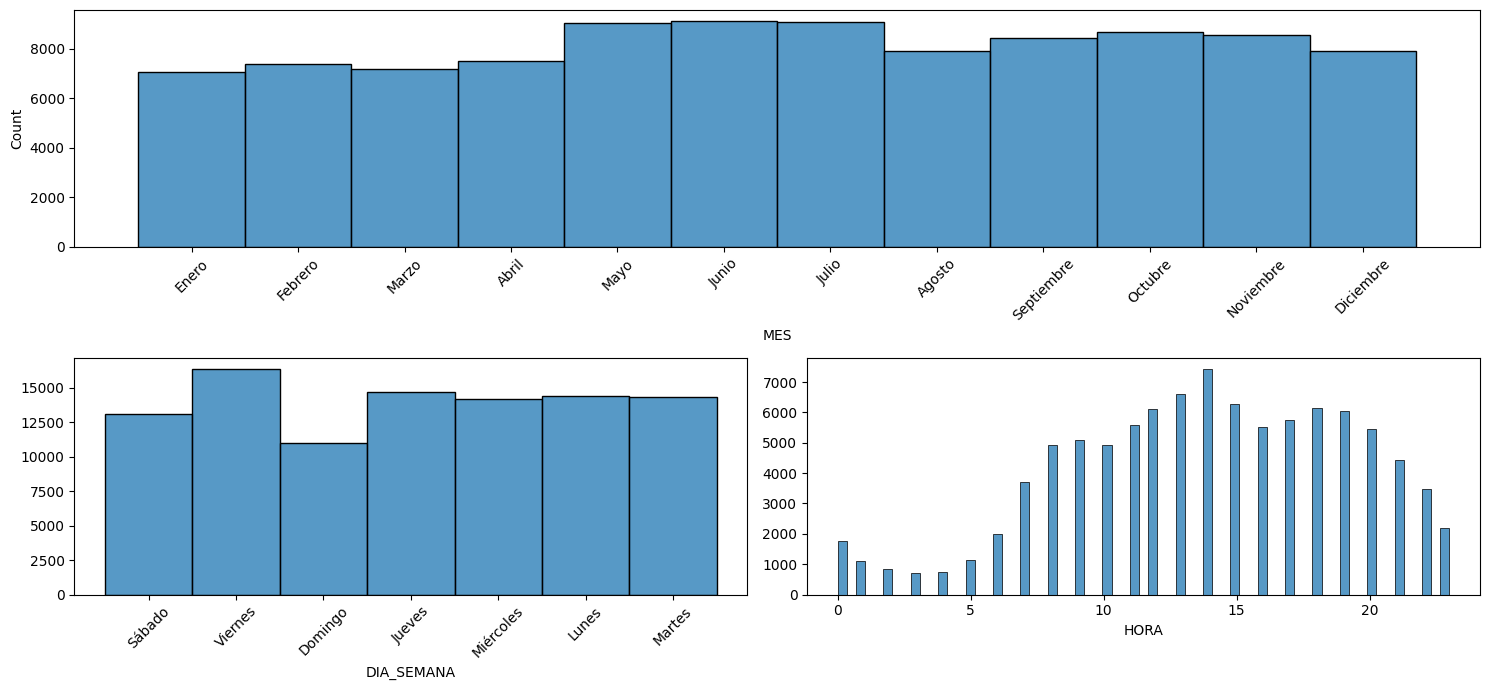

: 

In [ ]:
#Relación entre la fecha y los accidentes
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(2, 2, figure=fig)
ax_mes = fig.add_subplot(gs[0, :])      # Ocupa toda la primera fila
ax_dia = fig.add_subplot(gs[1, 0])      # Segunda fila, primera columna
ax_hora = fig.add_subplot(gs[1, 1])     # Segunda fila, segunda columna

sns.histplot(data=df_eda, x='MES', ax=ax_mes)
ax_mes.tick_params(axis='x', rotation=45)

#Ordenar columna dias de la semana
sns.histplot(data=df_eda, x='DIA_SEMANA', ax=ax_dia).set(ylabel=None)
ax_dia.tick_params(axis='x', rotation=45)
sns.histplot(data=df_eda, x='HORA', ax=ax_hora).set(ylabel=None)

plt.tight_layout()
plt.show()

<font color="red">No entiendo por que los días de la semana salen desordenados </font>

Los accidentes son relativamente constantes, pero los 4 primeros meses del año se mantienen más bajos (~6000). Pero los meses de Mayo a Julio suben de manera abrupta pasándo de largo los 8000 incidentes por mes. Es probable que se deba a que en España exista un elevado número de días festivos durante estos meses. El resto del año se mantienen en un punto medio alrededor de 8000.

Respecto a los días de la semana entre diario se mantienen bastante constantes pero suben los viernes que es el día de más accidentes, supongo que se debe a que la gente sale más de fiesta ese día y que se toma más alcohol. Los domingos al contrario es el día que menos accidentes hay ya que probablemente también sea el día que menos se coge el coche. Lo que resulta curioso de este gráfico es que el número de accidentes es bastante constante siempre, la diferencia entre el día que más accidentes se producen y el que menos no es ni del 50%, esperábamos tendencias mucho más marcadas. Tal vez si miramos el tipo de accidentes o el número de víctimas si que veamos tendencias más marcadas.

La hora si presenta mayores tendencias. Las horas de la madrugada son las que menos accidentes tienen a pesar de que probablemente sea cuando los conductores están más cansados o bajo más sustancias, el considerable menor número de vehículos circulando a esa pesa demasiado en este gráfico, si tuviesemos los datos del número aproximado de vehículos circulando podríamos observar mejor si existe una mayor probabilidad de tener un accidente a esas horas. 
El mayor número de accidentes se produce a las 14:00, esto se debe a que a esa hora es hora punta, pero seguramente la mayoría de esos accidentes sean pequeños golpes y seguramente el número de accidentes mortales a esa hora no es muy alto, pero lo comprobaremos más adelante. Sorprendentemente las 18 que es la hora pico en España no es la que más accidentes tiene. Creo que este gráfico está demasiado influenciado por la densidad de tráfico a ciertas horas como para poder sacar mayores conclusiones.

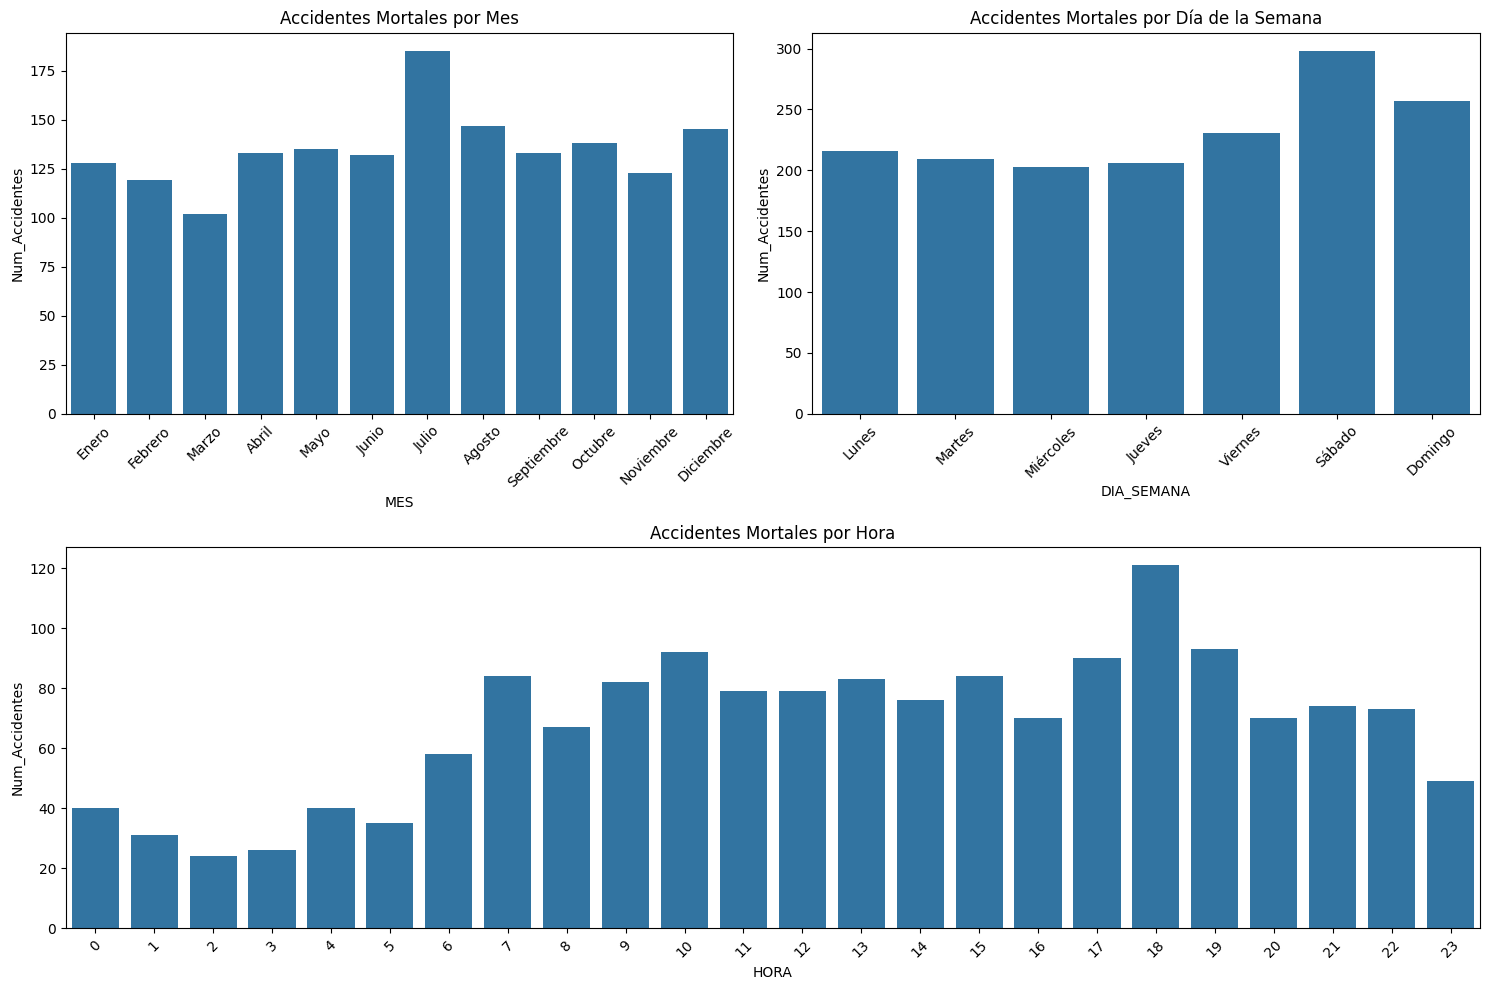

: 

In [ ]:
#Cantidad de accidentes graves y mortales en función de la fecha
# Filtrar solo los accidentes mortales (ajusta 'TYP_ACC' según cómo esté mapeado, por ejemplo, 'Mortal')
df_mortal = df_eda[df_eda['TYP_ACC'] == 'Mortal']

# Agrupar por MES y contar
acc_mes = df_mortal.groupby('MES').size().reset_index(name='Num_Accidentes')
ordered_months = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto',
                  'Septiembre','Octubre','Noviembre','Diciembre']
acc_mes['MES'] = pd.Categorical(acc_mes['MES'], categories=ordered_months, ordered=True)
acc_mes = acc_mes.sort_values('MES')

# Agrupar por DIA_SEMANA y contar
acc_dia = df_mortal.groupby('DIA_SEMANA').size().reset_index(name='Num_Accidentes')
ordered_days = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
acc_dia['DIA_SEMANA'] = pd.Categorical(acc_dia['DIA_SEMANA'], categories=ordered_days, ordered=True)
acc_dia = acc_dia.sort_values('DIA_SEMANA')

# Agrupar por HORA y contar
acc_hora = df_mortal.groupby('HORA').size().reset_index(name='Num_Accidentes')
acc_hora = acc_hora.sort_values('HORA')

# Configurar el layout
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax_mes = fig.add_subplot(gs[0, 0])
ax_dia = fig.add_subplot(gs[0, 1])
ax_hora = fig.add_subplot(gs[1, :])

# Graficar número de accidentes mortales por MES
sns.barplot(ax=ax_mes, data=acc_mes, x='MES', y='Num_Accidentes')
ax_mes.set_title('Accidentes Mortales por Mes')
ax_mes.tick_params(axis='x', rotation=45)

# Graficar número de accidentes mortales por Día de la Semana
sns.barplot(ax=ax_dia, data=acc_dia, x='DIA_SEMANA', y='Num_Accidentes')
ax_dia.set_title('Accidentes Mortales por Día de la Semana')
ax_dia.tick_params(axis='x', rotation=45)

# Graficar número de accidentes mortales por HORA
sns.barplot(ax=ax_hora, data=acc_hora, x='HORA', y='Num_Accidentes')
ax_hora.set_title('Accidentes Mortales por Hora')
ax_hora.tick_params(axis='x')

#Ajustar el layout
plt.tight_layout()
#Mostrar el plot
plt.show()


Lo primero que se observa en las gráficas de Mes y Día es la mayor variabilidad respecto a las gráficas anteriores, el mes de Julio sobresale del resto como el mes con más fallecidos, esto podría deberse a que se trata del mes donde más gente coge las vacaciones de verano y aunque pueda existe menor congestión de tráfico en las ciudades, se usa más en ambiente de fiesta y hay más congestión en las salidas de las ciudades donde la velocidad a la que se circula es mucho mayor incrementando la letalidad de los accidentes.

Respecto al gráfico de los días es curiosos que los dos días con menor número total de accidentes (Sábado y Domingo), sean también los días con mayor número de accidentes mortales. Esto tiene mucho sentido ya que en efecto hay menor tráfico en ciudad por lo que hay menor número de accidentes en total, no obstante la gente usa el coche en entornos con más alcohol (la gente que salga el viernes regresará en coche la madrugada del Sábado) y en salidas de la ciudad donde la circulación es a mayor velocidad que en vías interurbanas.

En el gráfico de horas ocurre lo contrario que en los otros dos, se observa menor variabilidad en comparación con el gráfico anterior. En el gráfico anterior las 4 era una de las horas con menos accidentes, habiendo aproximandamente 7 veces menos que a la hora pico, ahora, la diferencia es de solo 3 veces. Por supuesto las horas de la madrugada son horas con pocos accidentes mortales en comparación con horas pico pero esto confirma nuestras sospechas de que a esas horas hay mayor probabilidad de que un accidente sea mortal no obstante vamos a terminar de confirmarlo con un tercer gráfico. Las 18 es la hora pico de fallecidos coincidiendo con la hora a la que la mayoría de las personas salen del trabajo, imagino que el mayor número de victimas mortales se debe a que muchos accidentes ocurren en los tramos entre ciudades pero esto aún requiere mayor análisis.

Como hemos mencionado sería interesante tener una variable indicando el total de coches en circulación en cada accidente, aunque no disponemos de ella una aproximación bastante fiable es usar el número total de accidentes en un periodo como indicador del volumen de tráfico en ese mismo periodo, esto nos servirá para poder normalizar los datos y compararlos.

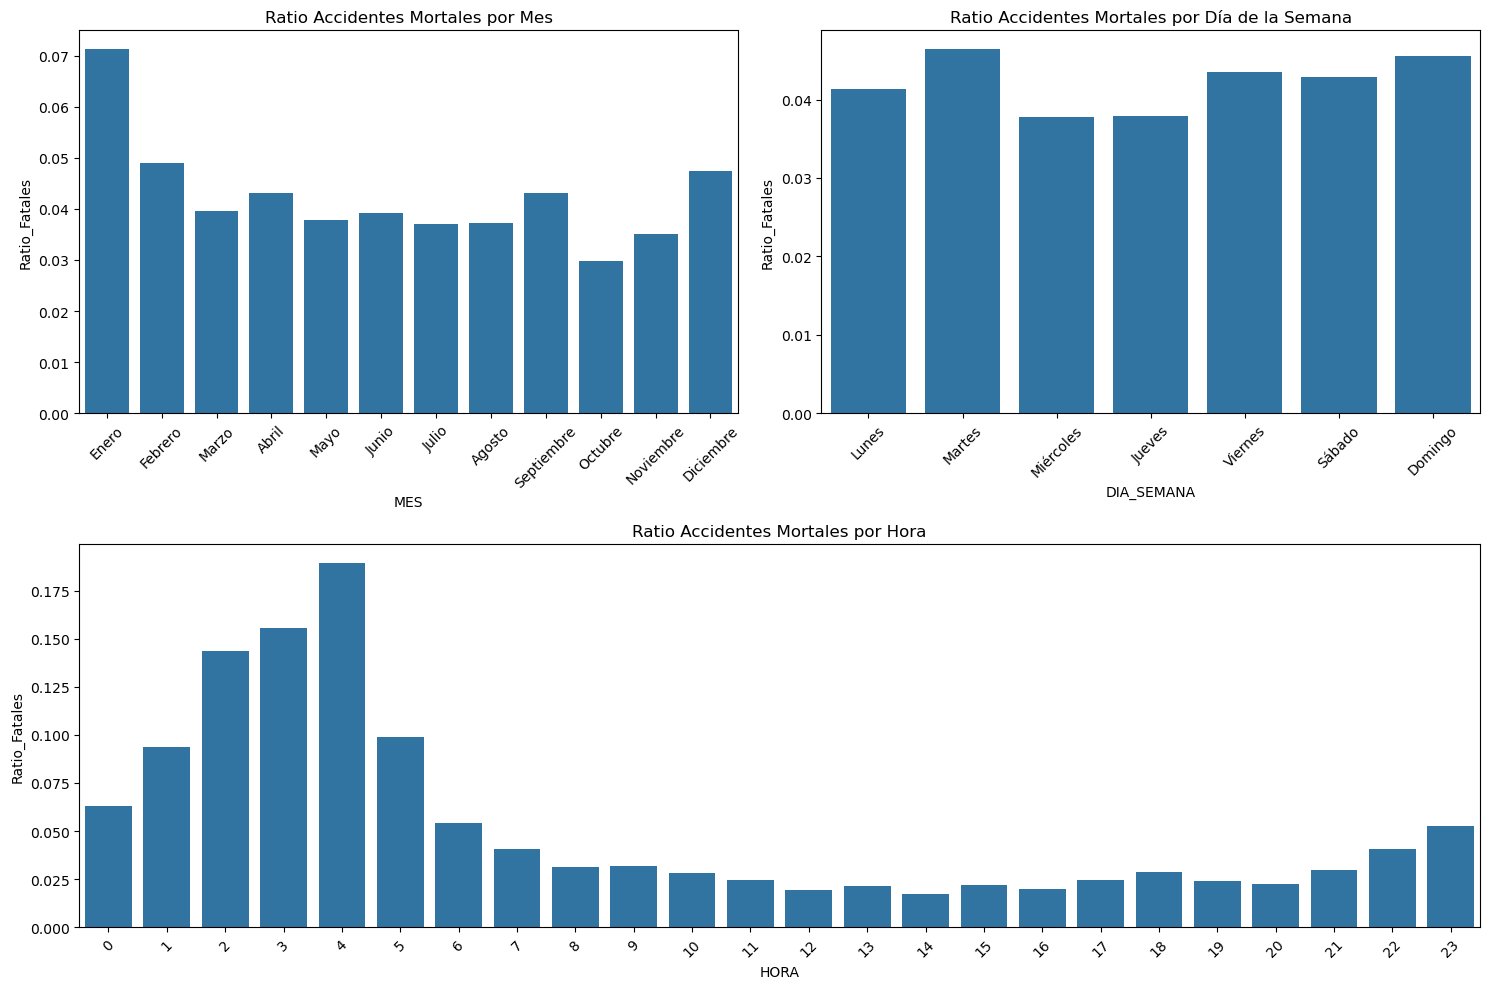

: 

In [ ]:
#agrupar todos los datos de cada categoría y accidentes mortales
total = df_eda.groupby(['MES','DIA_SEMANA','HORA']).size().reset_index(name='Total_Accidentes')
mortal = df_eda[df_eda['TYP_ACC'] == 'Mortal'].groupby(['MES','DIA_SEMANA','HORA']).size().reset_index(name='Accidentes_Mortales')

datos_fecha = pd.merge(total, mortal, on=['MES','DIA_SEMANA','HORA'], how='left')

#calcular el ratio de accidentes mortales
datos_fecha['Ratio_Fatales'] = datos_fecha['Accidentes_Mortales'] / datos_fecha['Total_Accidentes']

#ordenamos meses y semanas
datos_fecha['MES'] = pd.Categorical(datos_fecha['MES'], categories=ordered_months, ordered=True)
datos_fecha = datos_fecha.sort_values('MES')

datos_fecha['DIA_SEMANA'] = pd.Categorical(datos_fecha['DIA_SEMANA'], categories=ordered_days, ordered=True)
datos_fecha = datos_fecha.sort_values('DIA_SEMANA')

#Graficar
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax_mes = fig.add_subplot(gs[0, 0])
ax_dia = fig.add_subplot(gs[0, 1])
ax_hora = fig.add_subplot(gs[1, :])

# Graficar Ratio por MES
sns.barplot(ax=ax_mes, data=datos_fecha, x='MES', y='Ratio_Fatales',errorbar=None)
ax_mes.set_title('Ratio Accidentes Mortales por Mes')
ax_mes.tick_params(axis='x', rotation=45)

# Graficar Ratio por Día de la Semana
sns.barplot(ax=ax_dia, data=datos_fecha, x='DIA_SEMANA', y='Ratio_Fatales',errorbar=None)
ax_dia.set_title('Ratio Accidentes Mortales por Día de la Semana')
ax_dia.tick_params(axis='x', rotation=45)

# Graficar Ratio por HORA
sns.barplot(ax=ax_hora, data=datos_fecha, x='HORA', y='Ratio_Fatales',errorbar=None)
ax_hora.set_title('Ratio Accidentes Mortales por Hora')
ax_hora.tick_params(axis='x')

plt.tight_layout()
plt.show()


Este gráfico es el más ilustrativo de los tres ya que permite hacer una comparativa más justa, y nos dice el porcentaje real de que un accidente dado sea mortal.

El gráfico que más cambia respecto a los anteriores es el de las horas, que practicamente se ha invertido, ahora se observa como un accidente en las horas de la madrugada son potencialemente más peligrosos siendo el pico a las 4, donde la probabilidad de que un accidente sea mortal es de alrededor de un 18%. Este gráfico también demuestra que la hora tiene una clara correlación con el tipo de accidente.

El gráfico de meses también ha sufrido variaciones, resulta que los meses de verano no hay riesgo mayor que en los demás de que un accidente dado sea mortal, de echo el mes que resulto tener mayor ratio de accidentes mortales ha sido Enero con notable diferencia sobre el resto que más o menos mantienen un ratio estable. A priori no parece haber un indicio claro para este suceso, tal vez sea por el día de Nochevieja donde sale de fiesta tantísima gente, pero que un solo día afecte tanto a un mes entero resulta extraño.

Los días por el contrario se equilibraron casi por completo y no parece haber ningún día con un ratio de accidentes graves significativamente mayor al resto. Lo cual es un poco raro porque en el grupo de los Sábados observabamos menor número de accidentes pero mayor número de fallecidos, pero no parece ser que el ratio sea realmente mayor al de otros días.

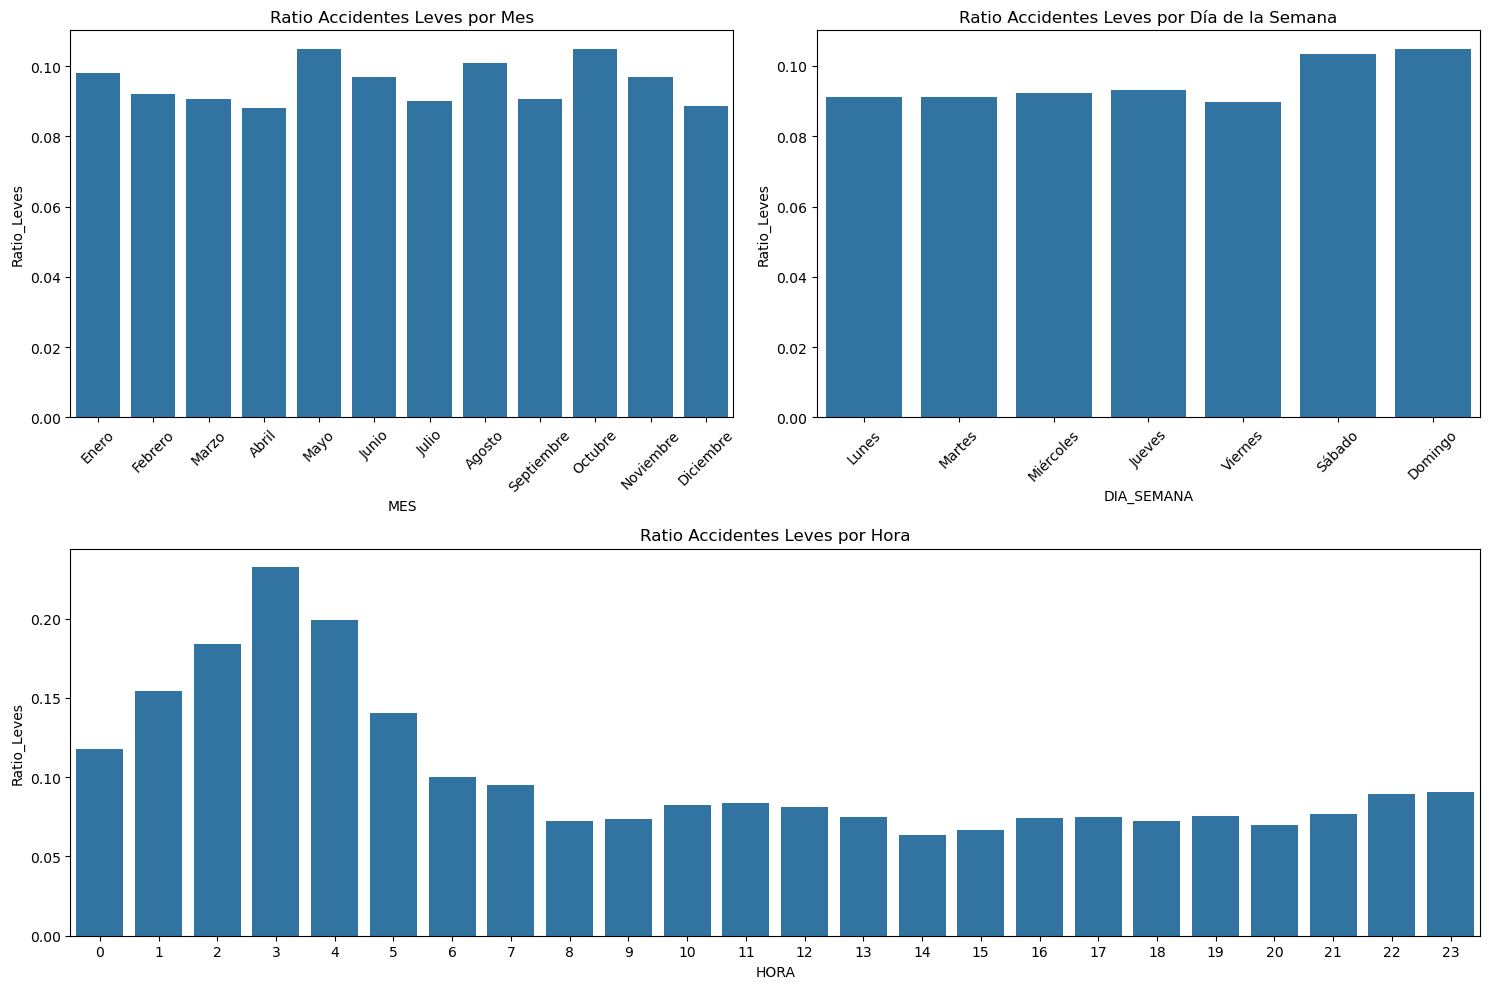

: 

In [ ]:
mortal = df_eda[df_eda['TYP_ACC'] == 'Leve'].groupby(['MES','DIA_SEMANA','HORA']).size().reset_index(name='Accidentes_Leves')

datos_fecha = pd.merge(total, mortal, on=['MES','DIA_SEMANA','HORA'], how='left')

#calcular el ratio de accidentes mortales
datos_fecha['Ratio_Leves'] = datos_fecha['Accidentes_Leves'] / datos_fecha['Total_Accidentes']
#ordenamos meses y semanas
datos_fecha['MES'] = pd.Categorical(datos_fecha['MES'], categories=ordered_months, ordered=True)
datos_fecha = datos_fecha.sort_values('MES')

datos_fecha['DIA_SEMANA'] = pd.Categorical(datos_fecha['DIA_SEMANA'], categories=ordered_days, ordered=True)
datos_fecha = datos_fecha.sort_values('DIA_SEMANA')

#Graficar
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax_mes = fig.add_subplot(gs[0, 0])
ax_dia = fig.add_subplot(gs[0, 1])
ax_hora = fig.add_subplot(gs[1, :])

# Graficar Ratio por MES
sns.barplot(ax=ax_mes, data=datos_fecha, x='MES', y='Ratio_Leves',errorbar=None)
ax_mes.set_title('Ratio Accidentes Leves por Mes')
ax_mes.tick_params(axis='x', rotation=45)

# Graficar Ratio por Día de la Semana
sns.barplot(ax=ax_dia, data=datos_fecha, x='DIA_SEMANA', y='Ratio_Leves',errorbar=None)
ax_dia.set_title('Ratio Accidentes Leves por Día de la Semana')
ax_dia.tick_params(axis='x', rotation=45)

# Graficar Ratio por HORA
sns.barplot(ax=ax_hora, data=datos_fecha, x='HORA', y='Ratio_Leves',errorbar=None)
ax_hora.set_title('Ratio Accidentes Leves por Hora')
ax_hora.tick_params(axis='x')

plt.tight_layout()
plt.show()

Por último vamos a representar el mismo gráfico de ratios pero para los accidentes Leves.

Se observa lo mismo que para el de ratios de accidentes graves para las horas y los días, los meses en cambio se vuelven más uniformes, ya no aparece ese pico en Enero, que el número de accidentes leves en Enero sea tan similar al resto hace pensar que la teoría de que el mayor número de accidentes graves se deba a la fiesta de Nochevieja.

/tmp/ipykernel_1548/1024838444.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_acc_cat, x='Categoría_Accidente', y='Num_Fallecidos', palette='crest')


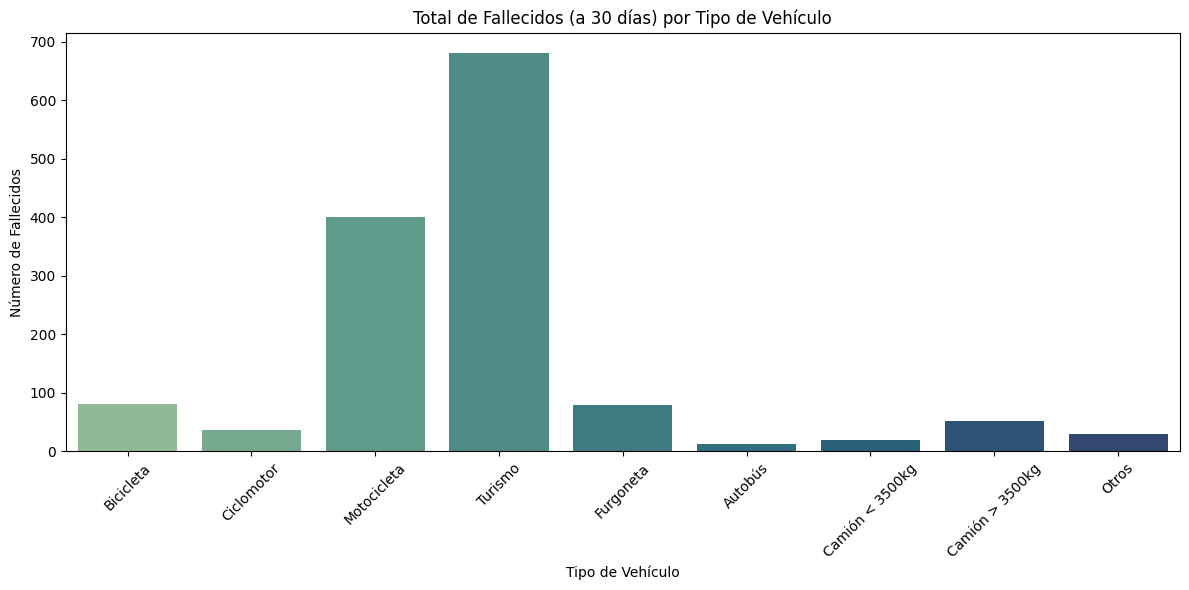

: 

In [ ]:
#Explorar el total de fallecidos de cada categoría
# Agrupar por categoría de vehículo (fallecidos a 30 días)
accidentes_por_categoria = {
    'Bicicleta': df_eda['TOT_BICI_MU30DF'].sum(),
    'Ciclomotor': df_eda['TOT_CICLO_MU30DF'].sum(),
    'Motocicleta': df_eda['TOT_MOTO_MU30DF'].sum(),
    'Turismo': df_eda['TOT_TUR_MU30DF'].sum(),
    'Furgoneta': df_eda['TOT_FURG_MU30DF'].sum(),
    'Autobús': df_eda['TOT_BUS_MU30DF'].sum(),
    'Camión < 3500kg': df_eda['TOT_CAM_MENOS3500_MU30DF'].sum(),
    'Camión > 3500kg': df_eda['TOT_CAM_MAS3500_MU30DF'].sum(),
    'Otros': df_eda['TOT_OTRO_MU30DF'].sum()
}

# Crear el DataFrame para graficar
df_acc_cat = pd.DataFrame(list(accidentes_por_categoria.items()), columns=['Categoría_Accidente', 'Num_Fallecidos'])

# Configurar el layout y graficar
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_acc_cat, x='Categoría_Accidente', y='Num_Fallecidos', palette='crest')

# Títulos y etiquetas
ax.set_title('Total de Fallecidos (a 30 días) por Tipo de Vehículo')
ax.set_xlabel('Tipo de Vehículo')
ax.set_ylabel('Número de Fallecidos')
ax.tick_params(axis='x', rotation=45)

#Ajustar el layout
plt.tight_layout()
#Mostrar el plot
plt.show()

Se observa que los vehículos con mayor número de fallecidos son los turismos, con un total de 681 víctimas registradas, seguido de los motoristas, con 401 víctimas. Esto puede indicar que, aunque los turismos son comúnmente considerados más seguros que los vehículos de dos ruedas, la gran cantidad de conductores y pasajeros de turismos en circulación podría influir en el número elevado de fallecidos.

Por otro lado, los conductores y pasajeros de bicicletas representan una cifra significativa, con 81 víctimas, lo que destaca la vulnerabilidad de los ciclistas en las vías. Los ciclomotoristas, con 36 víctimas, también forman parte de este grupo vulnerable, aunque en menor proporción en comparación con los motoristas y ciclistas.

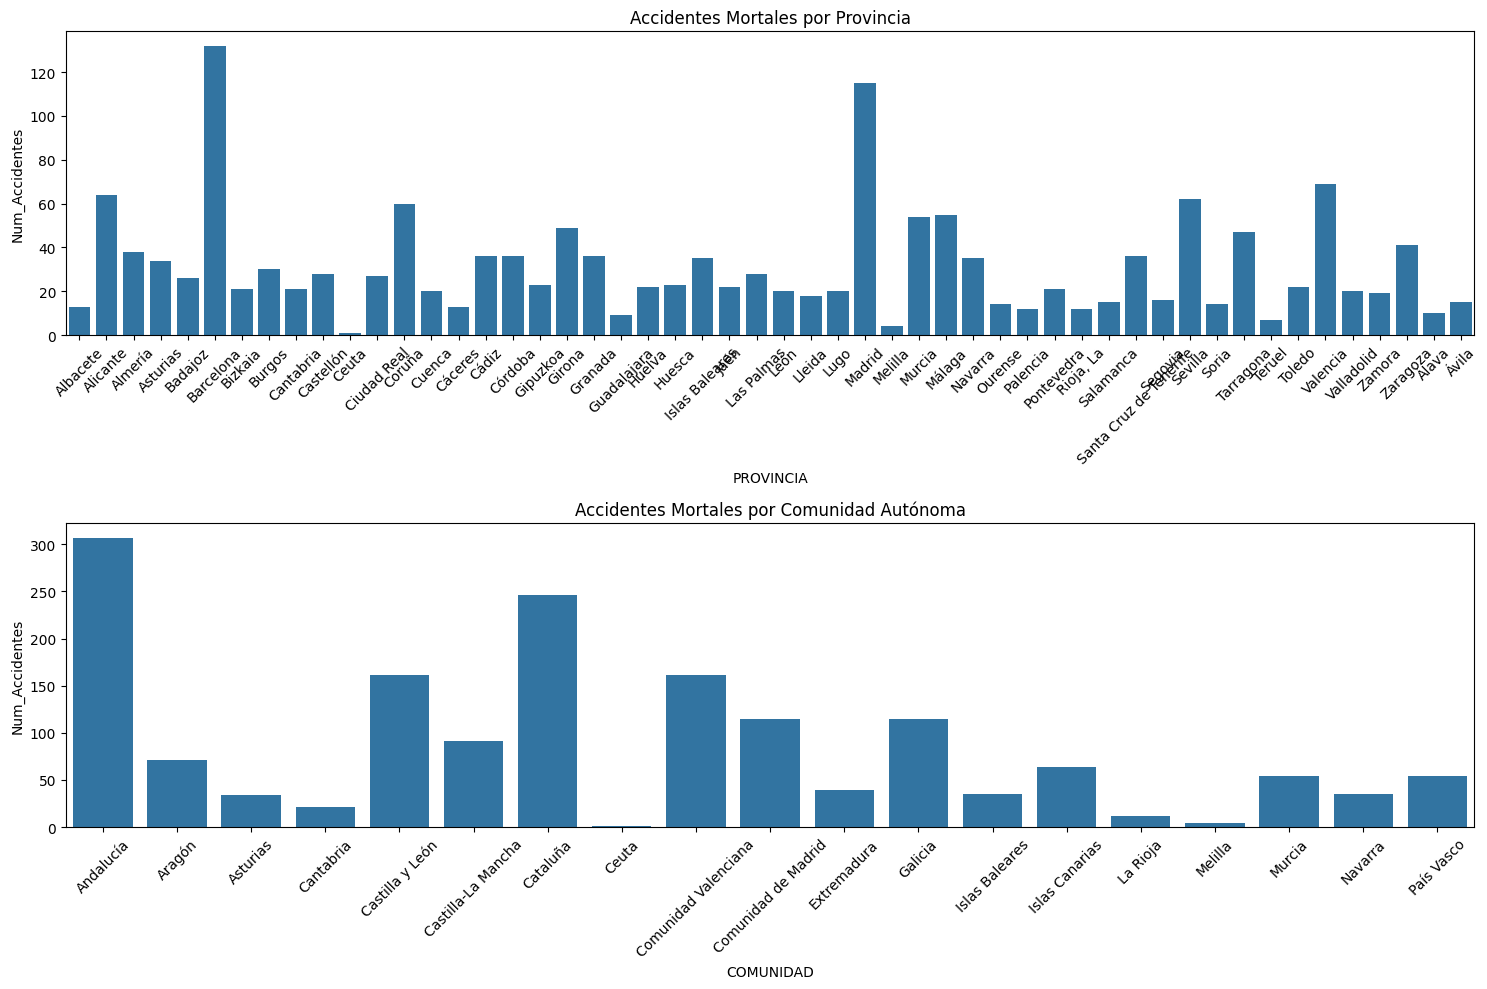

: 

In [ ]:
#¿Existen diferencias significativas entre comunidades autónomas?

#Cantidad de accidentes graves y mortales en función de la fecha
# Filtrar solo los accidentes mortales (ajusta 'TYP_ACC' según cómo esté mapeado, por ejemplo, 'Mortal')
df_mortal = df_eda[df_eda['TYP_ACC'] == 'Mortal']

# Agrupar por PROVINCIA y contar
acc_prov = df_mortal.groupby('PROVINCIA').size().reset_index(name='Num_Accidentes')
acc_prov['PROVINCIA'] = pd.Categorical(acc_prov['PROVINCIA'], ordered=True)
acc_prov = acc_prov.sort_values('PROVINCIA')

# Agrupar por COMUNIDAD y contar
acc_comun = df_mortal.groupby('COMUNIDAD').size().reset_index(name='Num_Accidentes')
acc_comun['COMUNIDAD'] = pd.Categorical(acc_comun['COMUNIDAD'], ordered=True)
acc_comun = acc_comun.sort_values('COMUNIDAD')


# Configurar el layout
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 1, figure=fig)
ax_provincia = fig.add_subplot(gs[0, 0])
ax_comunidad = fig.add_subplot(gs[1, 0])


# Graficar número de accidentes mortales por provincia
sns.barplot(ax=ax_provincia, data=acc_prov, x='PROVINCIA', y='Num_Accidentes')
ax_provincia.set_title('Accidentes Mortales por Provincia')
ax_provincia.tick_params(axis='x', rotation=45)

# Graficar número de accidentes mortales por comunidad autónoma
sns.barplot(ax=ax_comunidad, data=acc_comun, x='COMUNIDAD', y='Num_Accidentes')
ax_comunidad.set_title('Accidentes Mortales por Comunidad Autónoma')
ax_comunidad.tick_params(axis='x', rotation=45)

#Ajustar el layout
plt.tight_layout()
#Mostrar el plot
plt.show()

Comunidades Autónomas con más accidentes:

Andalucía se posiciona como la comunidad autónoma con mayor número de accidentes registrados, con un total de 307 casos, destacando notablemente sobre las demás regiones. Cataluña ocupa el segundo lugar con 246 accidentes, mostrando también una alta incidencia en términos de siniestralidad. En tercer lugar, hay un empate entre Castilla y León y la Comunidad Valenciana, ambas con 161 accidentes. Esto refleja una distribución más moderada en comparación con Andalucía y Cataluña.

Provincias con mayor número de accidentes:

Dentro de las provincias, sobresale Barcelona, con 132 accidentes, consolidándola como uno de los puntos más críticos en términos de tráfico y riesgo. Alicante y La Coruña siguen a Barcelona con 64 y 60 accidentes respectivamente, siendo las provincias más afectadas dentro de la Comunidad Valenciana y Galicia. En Madrid, la provincia homónima registra 115 accidentes, lo cual, aunque relevante, queda por debajo de las cifras de Barcelona.

Patrones generales:

Las comunidades autónomas y provincias con mayor densidad poblacional o con grandes áreas urbanas, como Cataluña (Barcelona) y Andalucía (varias provincias), son las que acumulan el mayor número de accidentes Sin embargo, hay casos de provincias menos pobladas, como Cantabria (21 accidentes) o Guadalajara (9 accidentes), donde la siniestralidad es significativamente menor, lo que podría estar relacionado con menor flujo vehicular.

# Influencia de la zona en el tipo de accidente

Vamos a estudiar ahora la distribución del tipo de accidente en ciertas variables.

In [ ]:
# 1. Calcular conteos por ZONA y TYP_ACC
df_counts = df_eda.groupby(['ZONA', 'TYP_ACC']).size().reset_index(name='count')

# 2. Calcular el total de accidentes para cada tipo de accidente
df_counts['total'] = df_counts.groupby('TYP_ACC')['count'].transform('sum')

# 3. Calcular el ratio (o porcentaje) para cada combinación
df_counts['ratio'] = df_counts['count'] / df_counts['total']

# 4. Graficar
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df_counts, x='ZONA', y='ratio', hue='TYP_ACC', errorbar=None)
ax.set_title('Distribución Normalizada de Accidentes por ZONA y Tipo')
ax.set_ylabel('Ratio de Accidentes por Tipo')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Para mostrar los valores en porcentaje

plt.tight_layout()
plt.show()

NameError: name 'df_eda' is not defined

: 

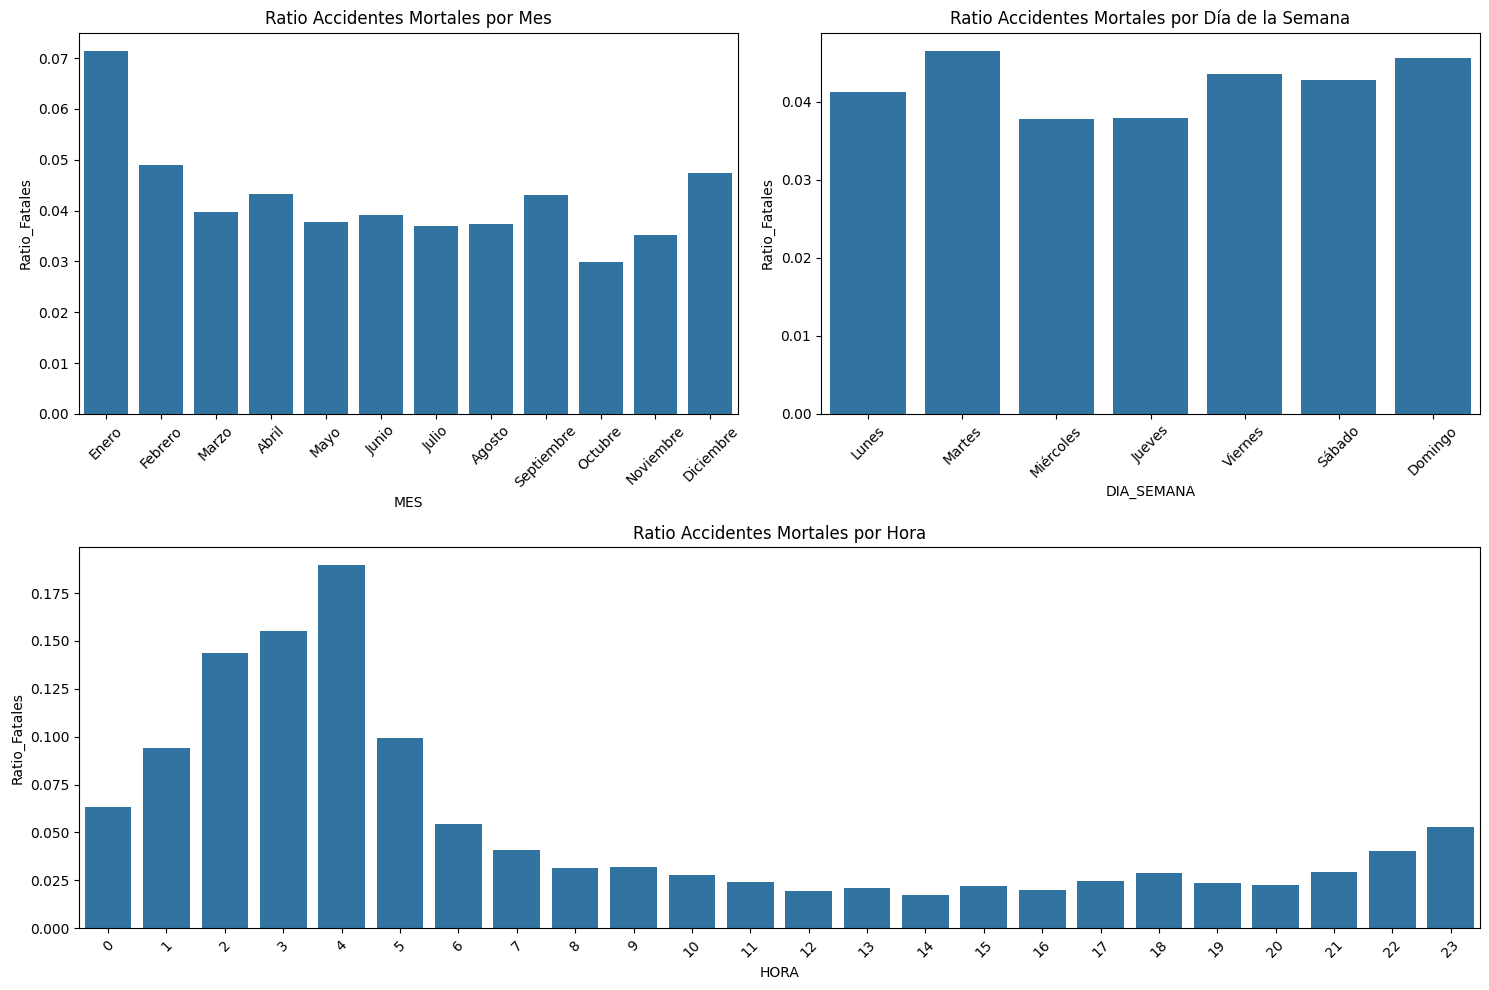

: 

In [ ]:
df_counts = df_eda.groupby(['ZONA', 'TYP_ACC']).size().reset_index(name='count')

# 2. Calcular el total de accidentes para cada tipo de accidente
df_counts['total'] = df_counts.groupby('TYP_ACC')['count'].transform('sum')

# 3. Calcular el ratio (o porcentaje) para cada combinación
df_counts['ratio'] = df_counts['count'] / df_counts['total']

# 4. Graficar
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df_counts, x='ZONA', y='ratio', hue='TYP_ACC', errorbar=None)
ax.set_title('Distribución Normalizada de Accidentes por ZONA y Tipo')
ax.set_ylabel('Ratio de Accidentes por Tipo')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Para mostrar los valores en porcentaje

plt.tight_layout()
plt.show()

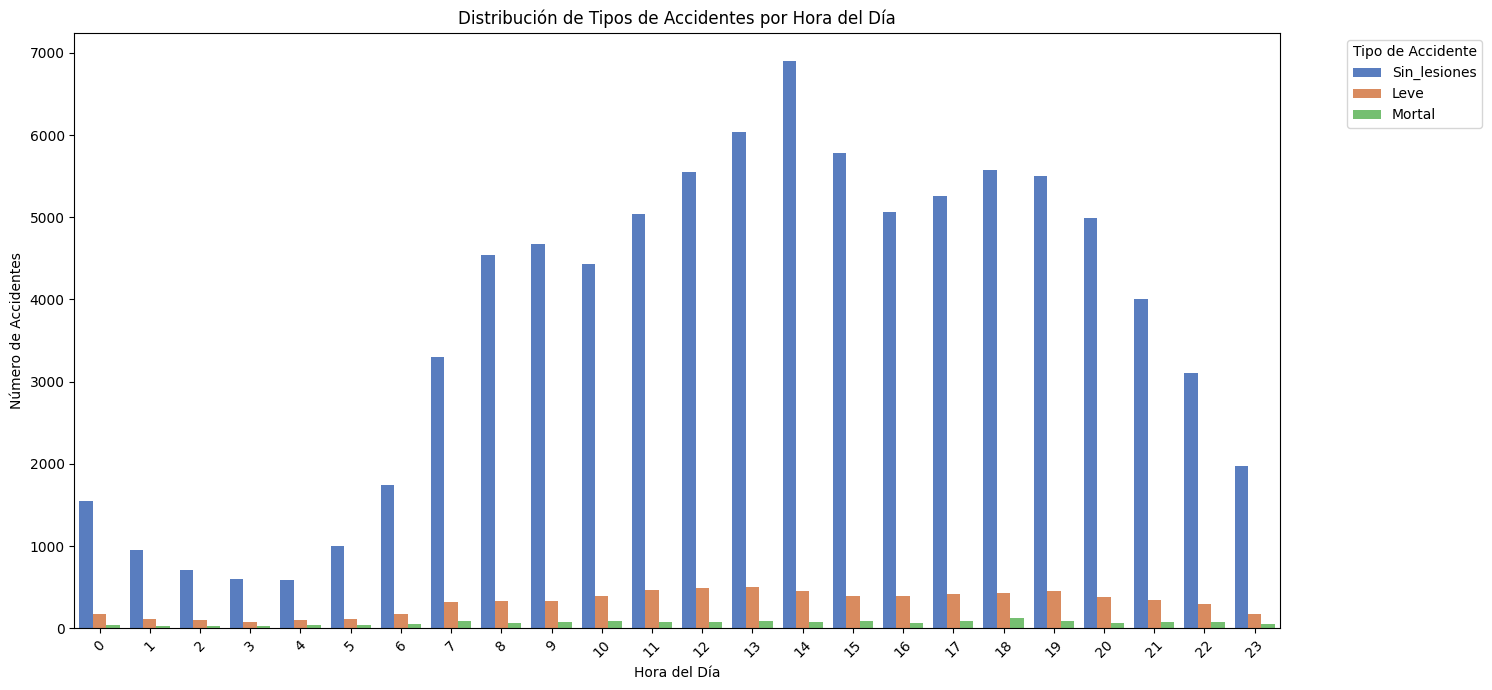

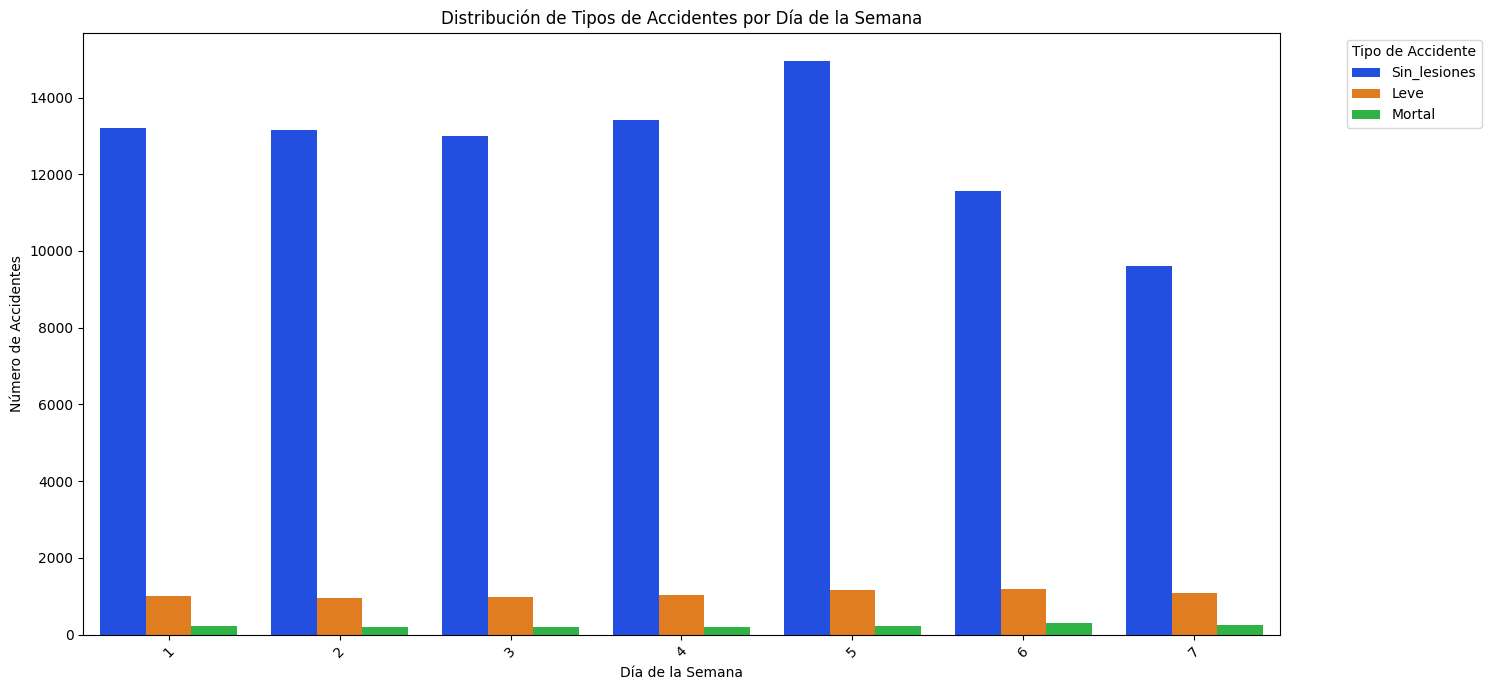

: 

In [ ]:
# A continuación, se estudia si tiene algún impacto la hora del día o el día de la semana sobre el tipo de accidente 

# Gráfico 1: Impacto de la hora del día en el tipo de accidente
plt.figure(figsize=(15, 7))
sns.countplot(data=df_eda, x='HORA', hue='TYP_ACC', palette='muted')
plt.title('Distribución de Tipos de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.xticks()
plt.legend(title='Tipo de Accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico 2: Impacto del día de la semana en el tipo de accidente
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='DIA_SEMANA', hue='TYP_ACC', palette='bright')
plt.title('Distribución de Tipos de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.xticks()
plt.legend(title='Tipo de Accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Horas con mayor número de accidentes:

El mediodía y primeras horas de la tarde (13:00 a 16:00) son los momentos más peligrosos para conducir, alcanzando un pico máximo a las 14:00 horas. Este patrón puede estar asociado al aumento de actividad durante esas horas, como desplazamientos relacionados con la comida, trabajo o estudio, y posiblemente mayor tráfico en vías urbanas e interurbanas.

Días con mayor número de accidentes:

Viernes y jueves son los días con más accidentes registrados, lo cual podría estar relacionado con la mayor movilidad por eventos sociales, salidas de fin de semana o preparativos de viajes.

Días con menor número de accidentes:

El sábado y domingo tienen la menor incidencia de accidentes, siendo el domingo el día con menos siniestros. Esto podría deberse a una disminución en los desplazamientos cotidianos relacionados con trabajo o estudios durante los fines de semana.

Este análisis puede ser útil para diseñar políticas de seguridad vial enfocadas en los momentos críticos y, al mismo tiempo, explorar estrategias para disminuir los accidentes relacionados con actividades rutinarias en horarios clave.

# PREGUNTAS EDA:
- Hacer la matrix donde se vean todas las variables, sacar las columnas de cada tipo de fallecido. <font color="gree,">Listo</font>
- Cual es la distribución de accidentes en meses dias y hora, es decir que meses, días, horas son más peligrosos para conducir? <font color="gree,">Listo</font>
- Existe algún o algunos municipios con un volumen sobresaliente de accidentes? Si no, crear comunidades y probar.
- ¿Existen diferencias significativas entre comunidades autónomas? <font color="red">Alejandro</font>
- Explorar el total de fallecidos de cada categoría, cuales más cuales menos etc.
- Tiene algún impacto la hora del día o el día de la semana sobre el tipo de accidente? Es decir si es por la mañana aumentan las probabilidades de que sea un atropello y si es por la tarde las probabilidades de que sea una colisión por ejemplo.
- Promedio victimas por accidente
- Como afecta la zona en la gravedad del accidente <font color="red">Carlos</font>

# Ideas: 
- comprobar si hay valores atípicos en el total de víctimas


<font color="red">Para poner mensajes en rojo </font>